# Final Project Notebook

In [786]:
# Import libraries

csv_url = 'https://raw.githubusercontent.com/arashrt/Laptop-Prices-Dataset-Analysis/main/amazon_laptop_prices_v01.csv'

import ssl
import urllib.request

from ucimlrepo import fetch_ucirepo 

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

laptopData = pd.read_csv(csv_url)


## A Big Picture View on the Dataset

In [787]:
laptopData

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,MSI,Stealth GS66 12UGS-025,15.6 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 3070,1.8 GHz,1.0,"$1,699.00"
4442,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
4443,Dell,Inspiron 3511 Laptop,15.6 Inches,Black,512 GB,Core i3,8 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,$591.99
4444,Dell,Latitude 3420 Laptop,14 Inches,NaN,512 GB,Core i5,8 GB,Windows 10 Pro,NaN,Integrated,Intel Integrated Graphics,0.9 GHz,NaN,"$1,771.99"


In [788]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [789]:

laptopData.isna().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      100
ram                       61
OS                        26
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

## Date Clean Up


### To Do:
- Convert numeric data to one merit units 
- Clean numeric values from unwanted characters
- Switch data type of numerical values from categorical back to numerical

#### screen_size column

In [790]:
laptopData['screen_size'].value_counts()

screen_size
15.6 Inches     1995
14 Inches       1113
16 Inches        362
15.66 Inches     196
13.3 Inches      194
17.3 Inches      150
17 Inches         89
11.6 Inches       84
13.4 Inches       43
18 Inches         41
13 Inches         36
15 Inches         25
13.5 Inches       11
12.5 Inches       10
14.1 Inches        9
12 Inches          7
10.1 Inches        7
13.1 Inches        6
16.1 Inches        5
14.5 Inches        4
16.2 Inches        4
13.6 Inches        4
15.4 Inches        3
12.3 Inches        3
13.9 Inches        3
11 Inches          2
12.4 Inches        2
12.45 Inches       2
10.5 Inches        1
12.2 Inches        1
14.4 Inches        1
15.3 Inches        1
22 Inches          1
27 Inches          1
10 Inches          1
Name: count, dtype: int64

In [791]:
laptopData['screen_size'].replace(' Inches', '', regex = True, inplace = True)
laptopData.screen_size = pd.to_numeric(laptopData.screen_size)

#### harddidsk column

In [792]:
laptopData.harddisk.value_counts()

harddisk
1000 GB    1334
512 GB      747
256 GB      476
1 TB        315
64 GB       194
1152 GB     177
2000 GB     165
2 TB        124
128 GB      114
32 GB        48
4000 GB      47
500 GB       34
4 TB         26
8000 GB      18
320 GB        8
16 GB         8
160 GB        4
6000 GB       3
480 GB        2
240 GB        2
8 GB          2
8 TB          2
1024 GB       2
2048 GB       1
1512 GB       1
640 GB        1
512 MB        1
1.5 TB        1
256           1
1.92 TB       1
32 MB         1
1256 GB       1
64 MB         1
250 GB        1
128 MB        1
512           1
300 GB        1
120 GB        1
65 GB         1
64            1
3 TB          1
Name: count, dtype: int64

In [793]:
# replace individual float TB values manualy with GB values
laptopData.harddisk.replace('1.5 TB', '1500 GB', inplace = True)
laptopData.harddisk.replace('1.92 TB', '1920 GB', inplace = True)

laptopData.harddisk.replace(' TB', '000', regex = True, inplace = True)
laptopData.harddisk.replace(' GB', '', regex = True, inplace = True)

# laptop hard-disk capacity in MB is not realistic so assume it is a mistake and treat MB values as GB
laptopData.harddisk.replace(' MB', '', regex = True, inplace = True)
laptopData.harddisk = pd.to_numeric(laptopData.harddisk)


#### cpu_speed column

In [794]:
laptopData['cpu_speed'].value_counts()

cpu_speed
1.1 GHz         509
1.8 GHz         410
1.2 GHz         312
2.6 GHz          31
2.4 GHz          24
1.7 GHz          17
1 GHz            12
2.8 GHz          12
2.3 GHz          11
5 GHz            11
3.5 GHz          11
3 GHz            10
2 GHz             9
2.2 GHz           8
4.5 GHz           7
3.4 GHz           7
1.6 GHz           7
4.6 GHz           6
2.7 GHz           6
3.7 GHz           6
4.2 GHz           6
2.1 GHz           6
2.5 GHz           6
4.7 GHz           6
1.9 GHz           5
4.8 GHz           5
3.6 GHz           5
2.9 GHz           4
1.3 GHz           4
5.6 GHz           3
3.8 GHz           3
4.4 GHz           3
4 GHz             2
3.2 GHz           2
3.9 GHz           2
3.4               2
2.53 GHz          2
3.3 GHz           2
5.1 GHz           2
4.3 GHz           2
3.3               2
4.1 GHz           2
5.2 GHz           1
2 Hz              1
3.1 GHz           1
1.9               1
2.5, 3.1 GHz      1
3200 Hz           1
2.2, 3.9 GHz      1
2133 MHz  

In [795]:
laptopData.cpu_speed.replace(" GHz","", inplace=True, regex=True)
laptopData.cpu_speed.replace("2133 MHz","2.1", inplace=True, regex=True)
laptopData.cpu_speed.replace("3200 Hz","3.2", inplace=True, regex=True)
laptopData.cpu_speed.replace(" Hz","", inplace=True, regex=True) # 2 hz seems to low, so we assumed that it was ghz

laptopData.cpu_speed.replace("9120", "9.1", inplace=True)
laptopData.cpu_speed.replace("2.2, 3.9", (2.2 + 3.9)/2, inplace=True)
laptopData.cpu_speed.replace("2.5, 3.1", (2.5 + 3.1)/2, inplace=True)

laptopData.cpu_speed = pd.to_numeric(laptopData.cpu_speed)



#### ram column

In [796]:
laptopData['ram'].value_counts()

ram
16 GB       1344
32 GB       1092
8 GB         791
64 GB        502
20 GB        331
4 GB         216
12 GB         40
24 GB         21
40 GB         13
48 GB         12
2 GB           9
1 GB           4
128 GB         3
6 GB           3
64 MB          1
5 GB           1
96 GB          1
31.99 GB       1
Name: count, dtype: int64

In [797]:
laptopData.ram.replace(" GB","", inplace=True, regex=True)
laptopData.ram.replace(" MB","", inplace=True, regex=True) # 64 mb is too low so assume its gb

laptopData.ram = pd.to_numeric(laptopData.ram)

#### Target

In [798]:
laptopData['price'].value_counts()

price
$389.99       315
$589.99       310
$999.99       252
$1,599.00     210
$1,699.00     204
             ... 
$2,629.98       1
$1,659.67       1
$245.01         1
$2,951.99       1
$938.99         1
Name: count, Length: 1858, dtype: int64

In [799]:
laptopData['price'] = laptopData['price'].str[1:]
laptopData.price = laptopData.price.str.replace(',', '')
laptopData.price.value_counts()

laptopData.price = pd.to_numeric(laptopData.price)

## Data Visualisation

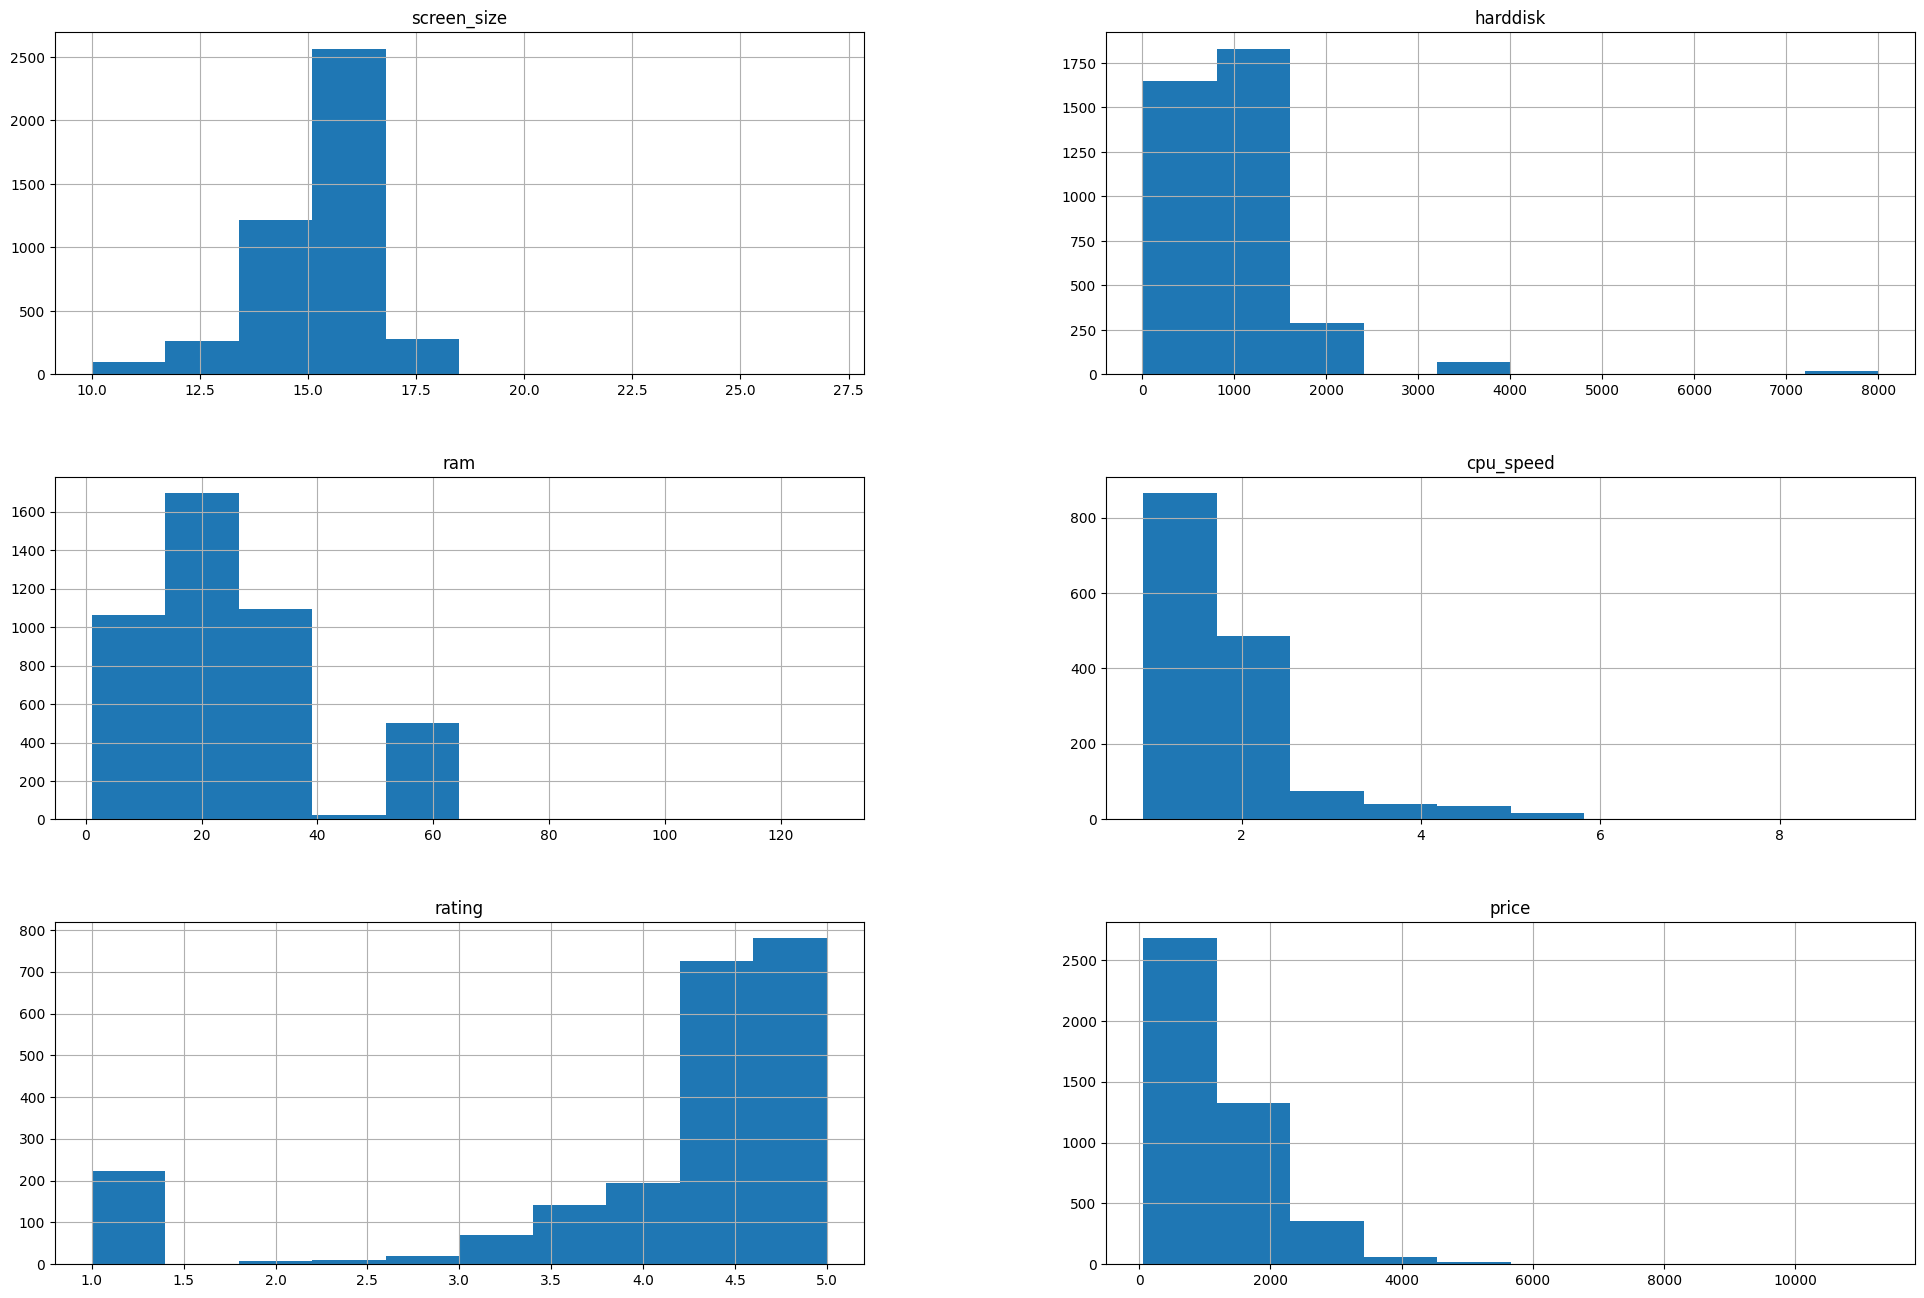

In [800]:
laptopData.hist(figsize=(24, 16))
plt.show()

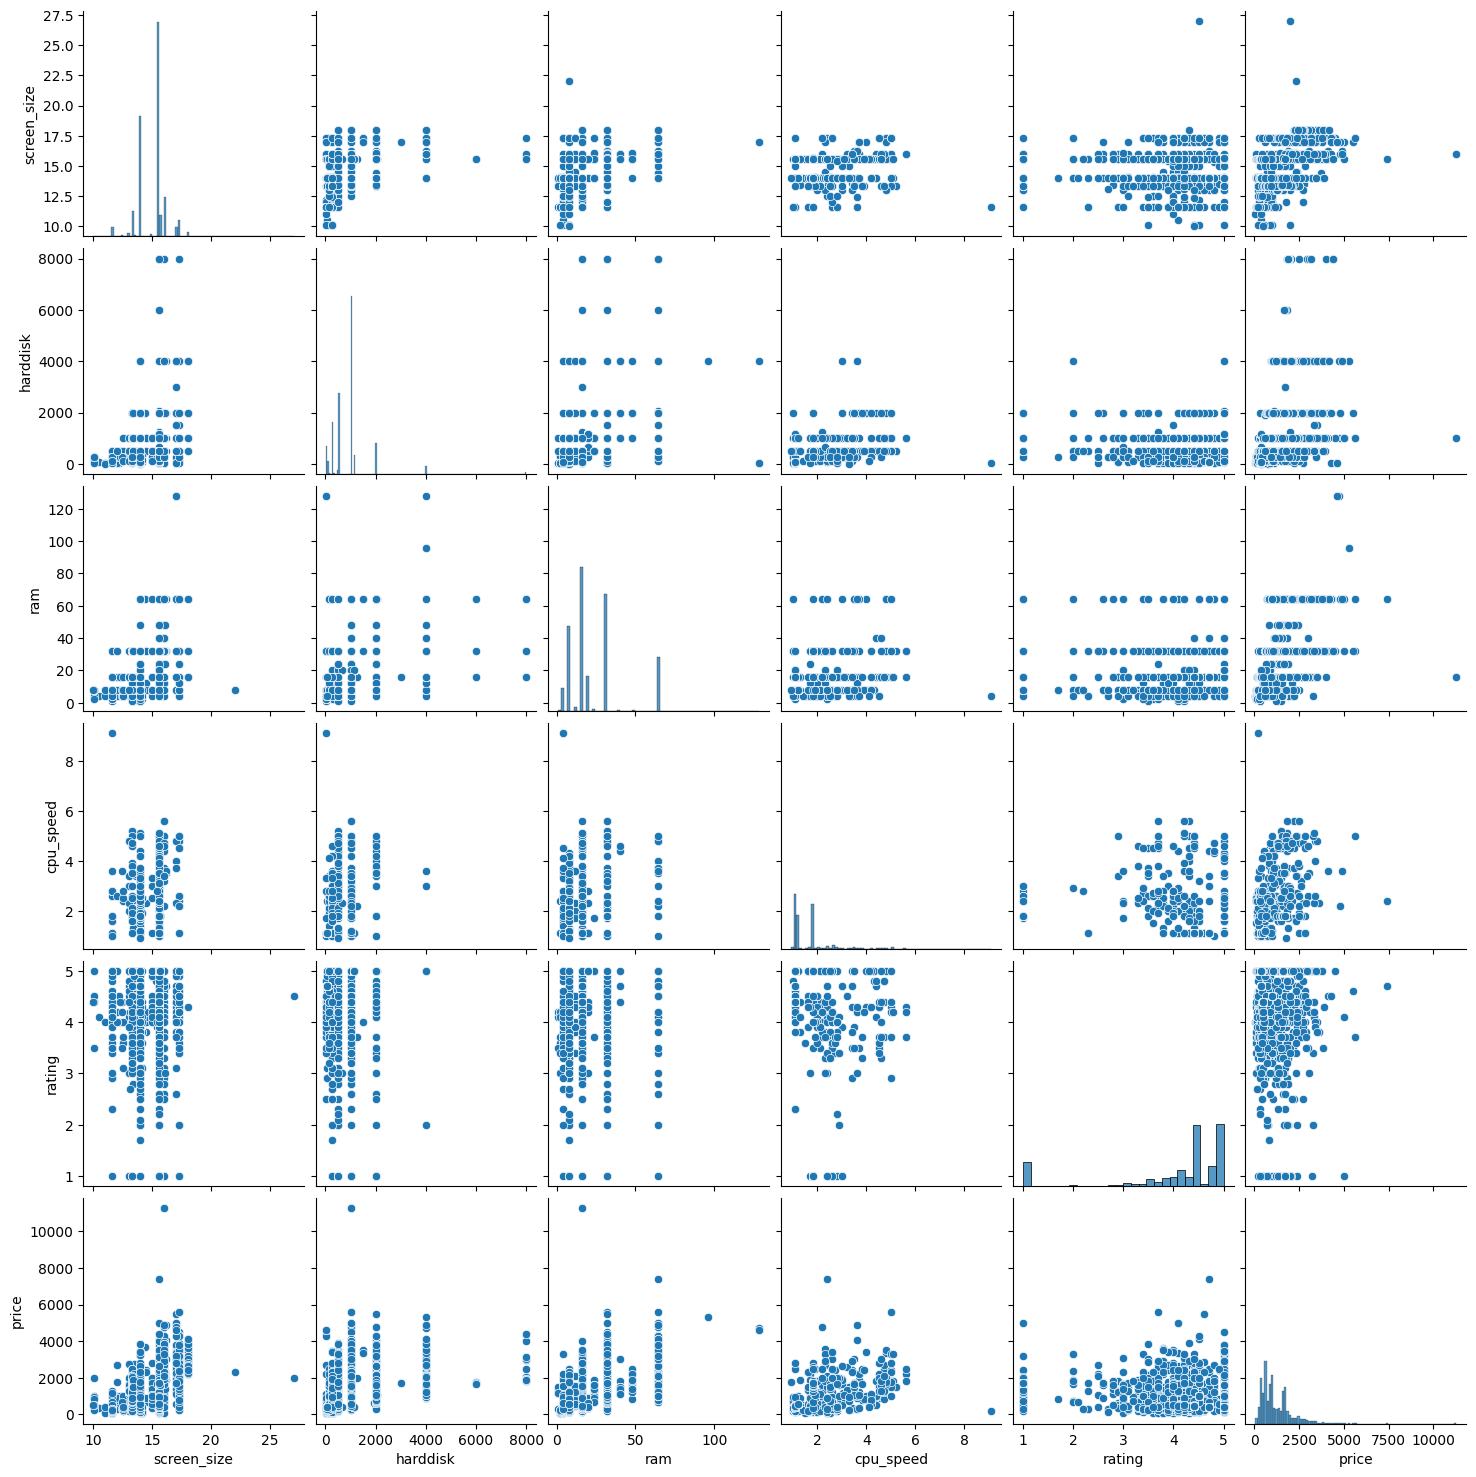

In [801]:
# Check for correlation between attributes using sns.pairplot.
sns.pairplot(laptopData)

In [802]:
corr_matrix = laptopData.corr(numeric_only=True)
corr_matrix

,screen_size,harddisk,ram,cpu_speed,rating,price
screen_size,1.000000,0.300325,0.422867,0.152537,-0.030169,0.386044
harddisk,0.300325,1.000000,0.367499,-0.070135,0.079411,0.331352
ram,0.422867,0.367499,1.000000,0.259310,-0.031823,0.434561
cpu_speed,0.152537,-0.070135,0.259310,1.000000,-0.186253,0.519964
rating,-0.030169,0.079411,-0.031823,-0.186253,1.000000,-0.277957
price,0.386044,0.331352,0.434561,0.519964,-0.277957,1.000000


In [803]:
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
cpu_speed      0.519964
ram            0.434561
screen_size    0.386044
harddisk       0.331352
rating        -0.277957
Name: price, dtype: float64

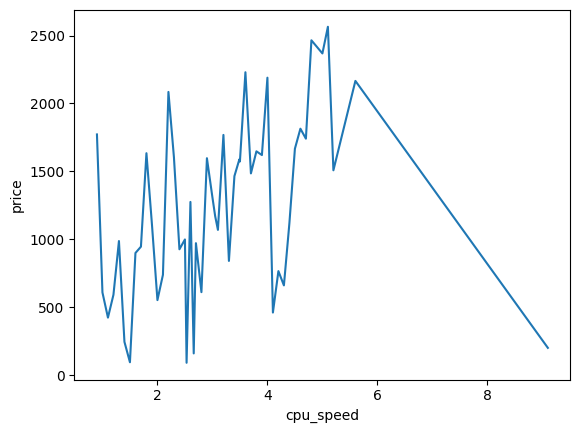

In [804]:
cpu_speedvsprice = sns.lineplot(x="cpu_speed", y="price", data=laptopData, errorbar=None)

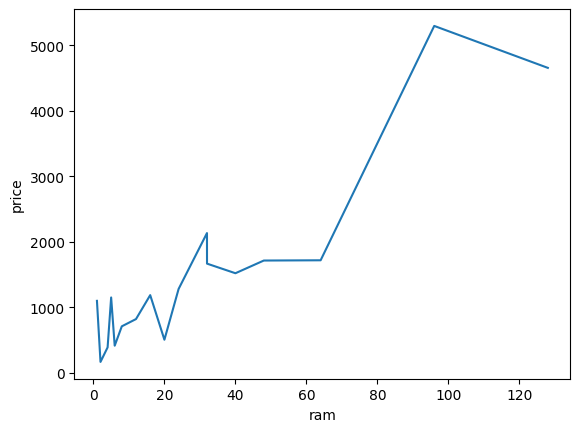

In [805]:
ramvsprice = sns.lineplot(x="ram", y="price", data=laptopData, errorbar=None)

## Dataset Preaparation for ML

### Replacing 'uknonwn' fields with NaN values

In [806]:
laptopData.mask(laptopData != 'Unknown', other = False, axis = 0).mask(laptopData == 'Unknown', other = True, axis = 0).sum()

brand                    0
model                    0
screen_size              0
color                    0
harddisk                 0
cpu                     10
ram                      0
OS                       1
special_features         0
graphics                 0
graphics_coprocessor     0
cpu_speed                0
rating                   0
price                    0
dtype: object

In [807]:
laptopData = laptopData.replace('Unknown', np.nan)
laptopData.isna().sum()

brand                      0
model                   1164
screen_size               29
color                    579
harddisk                 576
cpu                      110
ram                       61
OS                        27
special_features        2392
graphics                  65
graphics_coprocessor    1872
cpu_speed               2926
rating                  2272
price                      5
dtype: int64

### Remove Empty Data and Separate Target from Features

In [808]:
laptopData.dropna(subset=["price"], inplace=True)

In [809]:
X = laptopData.drop(['price'], axis = 1)
X = X.drop(['special_features', 'graphics_coprocessor','graphics', 'rating'], axis = 1)
X.dropna(subset=["cpu_speed"], inplace=True)

y = laptopData.drop(['special_features', 'graphics_coprocessor', 'graphics', 'rating'], axis = 1)
y.dropna(subset=["cpu_speed"], inplace=True)
y = pd.DataFrame(y.price)

### Fill Left Empty Data with Mean and Most Frequent Values

In [810]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numericCols = X.select_dtypes(include='number').columns.to_list()
categoricalCols = X.select_dtypes(exclude='number').columns.to_list()



In [811]:
print(numericCols)

['screen_size', 'harddisk', 'ram', 'cpu_speed']


In [812]:
print(categoricalCols)

['brand', 'model', 'color', 'cpu', 'OS']


In [813]:
numPipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
catPipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output = False))

preprocessing = ColumnTransformer([('numerical', numPipeline, numericCols),
                                   ('categorical', catPipeline, categoricalCols)],
                                    remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['screen_size', 'harddisk', 'ram',
                                  'cpu_speed']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['brand', 'model', 'color', 'cpu', 'OS'])])

In [814]:
# Apply the preprocessing pipeline on the dataset

preparedData = preprocessing.fit_transform(X)

# Scikit-learn strips the column headers, so just add them back on afterward.

feature_names=preprocessing.get_feature_names_out()
preparedData = pd.DataFrame(data = preparedData, columns=feature_names)
preparedData


,numerical__screen_size,numerical__harddisk,numerical__ram,numerical__cpu_speed,categorical__brand_ASUS,categorical__brand_Alienware,categorical__brand_Apple,categorical__brand_Computer Upgrade King,categorical__brand_Dell,categorical__brand_Gateway,...,categorical__OS_Windows 11 Home,categorical__OS_Windows 11 Home in S Mode,categorical__OS_Windows 11 Pro,categorical__OS_Windows 11 S,categorical__OS_Windows 7,categorical__OS_Windows 7 Home Premium,categorical__OS_Windows 7 Professional,categorical__OS_Windows 8,categorical__OS_macOS 10.14 Mojave,categorical__OS_macOS 12 Monterey
0,-0.990458,5.143050e-01,-1.069805,-0.542680,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.752971,-3.088765e-16,1.225548,0.167642,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.689956,9.272747e-01,0.077872,-0.661067,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.689956,5.143050e-01,-0.304687,-0.661067,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.511079,-2.028719e+00,-1.452364,-0.661067,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0.752971,-3.088765e-16,1.225548,0.167642,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1516,0.689956,-3.088765e-16,1.225548,0.167642,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1517,-0.990458,5.143050e-01,-1.069805,-0.542680,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518,-0.990458,-8.115453e-01,-1.069805,-0.897841,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Data for Training and Testing

In [815]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preparedData, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1216, 353) (1216, 1) (304, 353) (304, 1)


## Apply ML Algorythms on Training Dataset

In [824]:
from sklearn.linear_model import Ridge, Lasso
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)
linearPredict = linearModel.predict(X_test)

ridgeRegression = Ridge(alpha=1)
ridgeModel = ridgeRegression.fit(X_train, y_train)
ridgePredict = ridgeModel.predict(X_test)

lassoRegression = Lasso(alpha=1)
lassoModel = lassoRegression.fit(X_train, y_train)
lassoPredict = lassoModel.predict(X_test)

randomForest = RandomForestClassifier(n_estimators = 100)

lab = preprocessing.LabelEncoder()
yTransformed = lab.fit_transform(y_train)
yTestTransformed = lab.fit_transform(y_test)

randomForestModel = randomForest.fit(X_train, yTransformed)
randomForestPredict = randomForestModel.predict(X_test)


c:\Users\msg4m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\msg4m\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [827]:
from sklearn.metrics import mean_squared_error as mse

print("Linear regression: ","Score:", linearModel.score(X_test, y_test), "MSE:", mse(y_test, linearPredict))
print("Ridge regression: ", "Score:", ridgeModel.score(X_test, y_test), "MSE:", mse(y_test, ridgePredict))
print("Lasso regression: ", "Score:", lassoModel.score(X_test, y_test), "MSE:", mse(y_test, lassoPredict))
print("Random Foreast Classifier: ", "Score:", randomForestModel.score(X_test, yTestTransformed),"MSE:", mse(y_test, randomForestPredict))


Linear regression:  Score: -1.937350819525748e+20 MSE: 9.730441707620565e+25
Ridge regression:  Score: 0.7496223489167662 MSE: 125753.43165533412
Lasso regression:  Score: 0.7868847446182701 MSE: 107038.20643099751
Random Foreast Classifier:  Score: 0.0 MSE: 1270532.9549500002


## Actual vs Predicted Price for Lasso Model

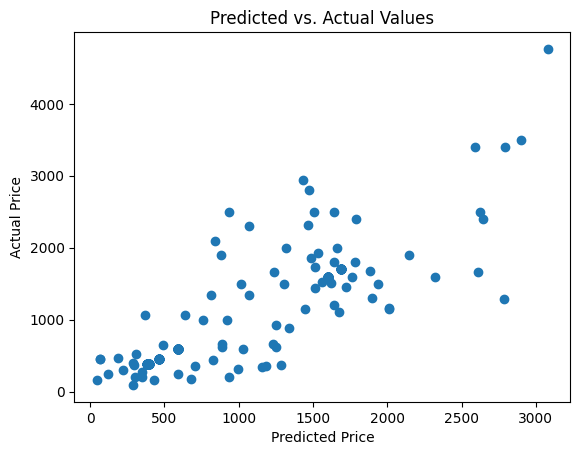

In [830]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained linear regression model
plt.scatter(lassoPredict, y_test)  # y is your actual target values
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs. Actual Values")
plt.show()